# CMU MOVIES SUMMARY CORPUS DATASET PRE-PROCESSING

## PRE-PROCESSING OF MOVIE.METADATA.TSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
headers_movies = ['WikiMovieID', 
                  'FreebaseMovieID', 
                  'MovieName', 
                  'ReleaseDate', 
                  'BORevenue', 
                  'Runtime',
                  'Languages', 
                  'Countries', 
                  'MovieGenre']

movies = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=headers_movies)

movies.head(2)

,WikiMovieID,FreebaseMovieID,MovieName,ReleaseDate,BORevenue,Runtime,Languages,Countries,MovieGenre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."


Check the types of each column of the dataset

In [3]:
movies.dtypes

WikiMovieID          int64
FreebaseMovieID     object
MovieName           object
ReleaseDate         object
BORevenue          float64
Runtime            float64
Languages           object
Countries           object
MovieGenre          object
dtype: object

Check for the percent of missing values in every column

In [4]:
def count_missing(data):
    N = len(data)
    percent_missing = (data.isna().sum() / N) * 100
    return percent_missing

missings=[]

for column in movies:
    missings.append(count_missing(movies[column]))

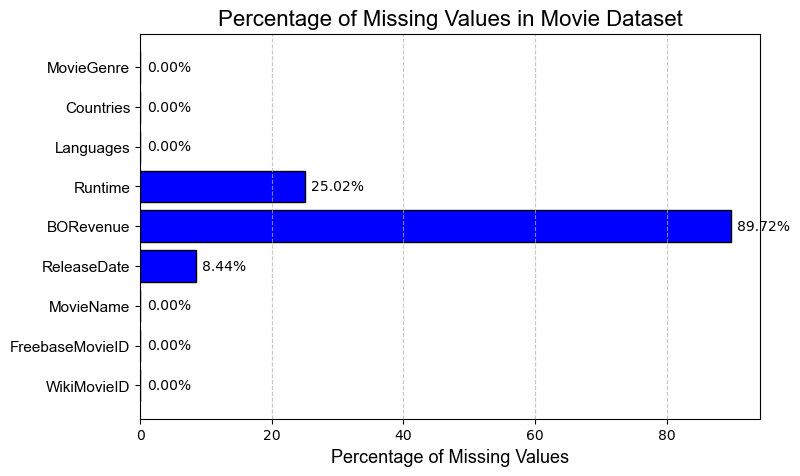

In [5]:
# Plot the percent of missing values in every column

plt.figure(figsize=(8, 5))

bars = plt.barh(headers_movies, missings, color='blue', edgecolor='black')

# Add the height of the bars
for index, value in enumerate(missings):
    plt.text(value + 1, index, f'{value:.2f}%', va='center')
plt.yticks(np.arange(movies.shape[1]), headers_movies, fontdict={'fontname': 'Arial', 'fontsize': 11})

plt.xlabel('Percentage of Missing Values', fontdict={'fontname': 'Arial', 'fontsize': 13})
plt.title('Percentage of Missing Values in Movie Dataset', fontdict={'fontname': 'Arial', 'fontsize': 16})
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

---

## Check the 'ReleaseDate' column

---

In [6]:
def convert_date(date_string):
    try:
        return pd.to_datetime(date_string, format='%Y-%m-%d')
    except ValueError:
        try:
            return pd.to_datetime(date_string, format='%Y-%m')
        except ValueError:
            try:
                return pd.to_datetime(date_string, format='%Y')
            except ValueError:
                return pd.to_datetime(date_string, format='%Y-%m-%d %H:%M:%S.%f')          
            
# There is one film, called 'Hunting Season', whose date is incorrect. 
# It was released in 2010, but in the dataset, the release year is shown as 1010. 
# We therefore need to correct this error.
movies.loc[movies['ReleaseDate']=='1010-12-02']
movies['ReleaseDate'] = movies['ReleaseDate'].replace('1010-12-02', '2010-12-02')

# Convert the date in the column 'ReleaseDate' into datetime
ReleaseDate_datatime = movies['ReleaseDate'].apply(convert_date)

# Add a column with the year of release only
movies['ReleaseYear'] = ReleaseDate_datatime.dt.year.fillna(0).astype(int) #OKAY TO HAVE NAN AS 0 ?
movies['ReleaseYear'] = movies['ReleaseYear'].astype('int64')
movies['ReleaseYear'].replace(0, np.nan, inplace=True)

Check for the distribution of the movies' release year

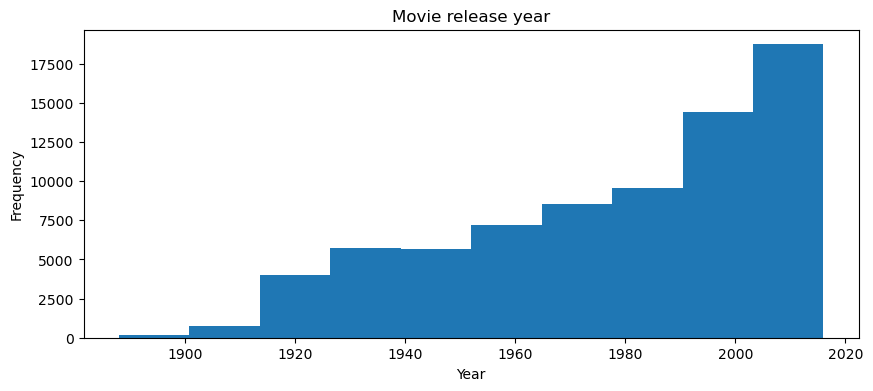

In [7]:
plt.figure(figsize=(10,4))

plt.hist(movies['ReleaseYear'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Movie release year')

plt.show()

---

## Check the 'Languages' column

---

In this column, the values are in a string-like dictionary format, and we will convert them into a dictionary for more efficient data manipulation and analysis.

In [8]:
# Change the str-like dictionary to a dictionary
import ast

movies['Languages'] = movies['Languages'].apply(ast.literal_eval)

Then, we can check the Languages that exist to see any inconsistencies in the data

In [9]:
# Show all the values that can exist for Languages
all_values = set() #set cannot contain duplicate values (allows to show unique values)

# Applying a function to extract values from each dictionary
movies['Languages'].apply(lambda x: all_values.update(x.values()) if isinstance(x, dict) else None)

print(sorted(all_values))

['Aboriginal Malay languages', 'Aceh Language', 'Afrikaans Language', 'Akan Language', 'Albanian language', 'Algonquin Language', 'American English', 'American Sign Language', 'Amharic Language', 'Ancient Greek', 'Apache, Western Language', 'Arabic Language', 'Aramaic language', 'Armenian Language', 'Assamese Language', 'Assyrian Neo-Aramaic Language', 'Assyrian language', 'Australian Aboriginal Pidgin English', 'Australian English', 'Awadhi Language', 'Azerbaijani language', 'Bambara language', 'Banyumasan language', 'Belarusian language', 'Bengali Language', 'Bhojpuri Language', 'Bosnian language', 'Brazilian Portuguese', 'Bulgarian Language', 'Burmese Language', 'Cantonese', 'Catalan language', 'Cebuano language', 'Chadian Arabic', 'Chechen Language', 'Chewa language', 'Cheyenne Language', 'Chhattisgarhi Language', 'Chinese language', 'Chinese, Hakka Language', 'Chinese, Jinyu Language', 'Classical Arabic', 'Corsican Language', 'Cree language', 'Croatian language', 'Crow Language', 

There are several inconsistencies in the Languages values:
- Italian + Italian language
- German, German Language, Deutsch
- France, French Language
- Hungarian language, Hungary
- Japan, Japanese language
- Mandarin chinese, Chinese language, Standard mandarin

---

## Check the 'Countries' column

---

In this column, the values are in a string-like dictionary format, and we will convert them into a dictionary for more efficient data manipulation and analysis.

In [10]:
# Change the str-like dictionary to a dictionary
import ast

movies['Countries'] = movies['Countries'].apply(ast.literal_eval)

Then, we can check the Countries that exist to see any inconsistencies in the data

In [11]:
# Show all the values that can exist for Countries

all_countries = set() #set cannot contain duplicate values

# Applying a function to extract values from each dictionary
movies['Countries'].apply(lambda x: all_countries.update(x.values()) if isinstance(x, dict) else None)

print(sorted(all_countries))

['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Crime', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia', 'Democratic Republic of the Congo', 'Denmark', 'Egypt', 'England', 'Estonia', 'Ethiopia', 'Federal Republic of Yugoslavia', 'Finland', 'France', 'Georgia', 'Georgian SSR', 'German Democratic Republic', 'German Language', 'Germany', 'Greece', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Iraqi Kurdistan', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Kingdom of Great Britain', 'Kingdom of Italy', 'Korea', 'Kuwait', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macau', 'Malayalam L

Could be useful to use country names with a specific format, if we want to analyse this data, or if we want to merge other datasets based on this (juste an idea, does not work well yet)

In [12]:
! pip install pycountry

In [13]:
import pycountry

def findCountryAlpha2 (country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_2
    except:
        return ("not founded!")
    
# Create a new column 'Country_Codes' to store the alpha-2 codes
movies['Country_Codes'] = None  # Create an empty column

# Update the new column 'Country_Codes' with alpha-2 country codes
for index, countries_release in movies['Countries'].items():
    countries = countries_release.values()
    alpha_2_codes = [findCountryAlpha2(country) for country in countries]
    movies.at[index, 'Country_Codes'] = alpha_2_codes

In [14]:
movies.head(4)

,WikiMovieID,FreebaseMovieID,MovieName,ReleaseDate,BORevenue,Runtime,Languages,Countries,MovieGenre,ReleaseYear,Country_Codes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,[not founded!]
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,[not founded!]
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988.0,[NO]
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987.0,[GB]


---

## Check the 'BORevenue' Column

---

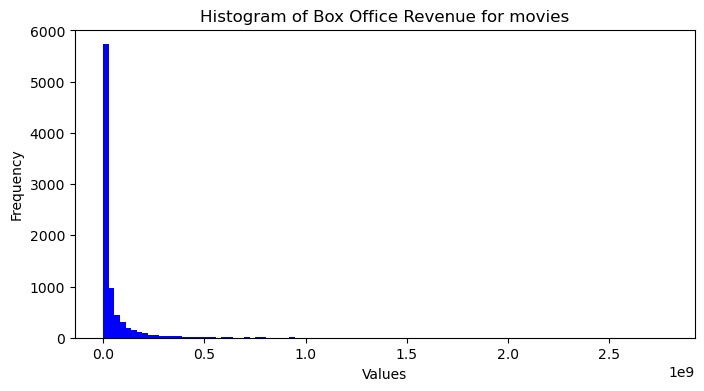

In [15]:
# Check the 'BORevenue' Column
# Are there some negative values ?

plt.figure(figsize=(8, 4))
plt.hist(movies['BORevenue'], bins=100, color='blue')
plt.title('Histogram of Box Office Revenue for movies')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

---

## Check the 'Runtime' Column

---

We first need to check for outliers

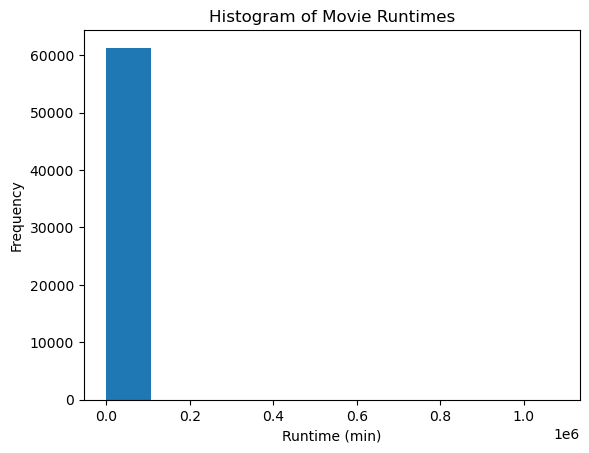

In [16]:
plt.hist(movies['Runtime'], bins=10)

plt.title('Histogram of Movie Runtimes')
plt.xlabel('Runtime (min)')
plt.ylabel('Frequency')

plt.show()

There are some outliers in the data, and we will identify them by calculating IQR. 
We will then remove data outside the lower/upper bound.

In [17]:
# IQR
Q1 = np.percentile(movies[movies['Runtime'].notnull()]['Runtime'], 25)
Q3 = np.percentile(movies[movies['Runtime'].notnull()]['Runtime'], 75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# Remove outlier
movies = movies[(movies['Runtime'] >= lower) & (movies['Runtime'] <= upper)]
movies.head()

,WikiMovieID,FreebaseMovieID,MovieName,ReleaseDate,BORevenue,Runtime,Languages,Countries,MovieGenre,ReleaseYear,Country_Codes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,[not founded!]
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,[not founded!]
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,{'/m/05f_3': 'Norwegian Language'},{'/m/05b4w': 'Norway'},"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988.0,[NO]
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,{'/m/02h40lc': 'English Language'},{'/m/07ssc': 'United Kingdom'},"{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987.0,[GB]
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,{'/m/04306rv': 'German Language'},{'/m/0345h': 'Germany'},"{""/m/07s9rl0"": ""Drama""}",1983.0,[DE]


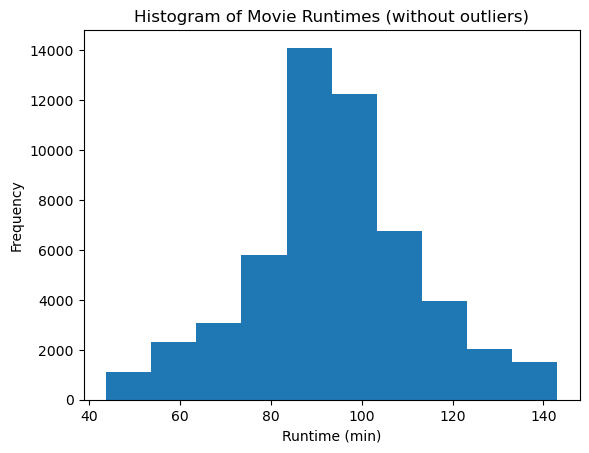

In [18]:
plt.hist(movies['Runtime'], bins=10)

plt.title('Histogram of Movie Runtimes (without outliers)')
plt.xlabel('Runtime (min)')
plt.ylabel('Frequency')

plt.show()

---

## Check the 'MovieName' column

---

PROBLEM: Need to find a way to identify duplicates.

IDEA: We could use MovieName, RunTime, ReleaseYear to identify a unique movie (or is the WikiMovieID already unique ?)

In [19]:
# Can some movies have the same name ?
name_duplicates = movies[movies.duplicated(subset='MovieName', keep=False)].copy(deep=True) 
n_d = len(name_duplicates['MovieName'])
n = len(movies['MovieName'])
print(f'There are {n_d} movies over {n} in the dataset that have a duplicated name')

# If they have the same name, can they be released in the same year ?
# Dropping 0 values from the 'ReleaseDate' column
movies_wo_0 = movies[movies['ReleaseDate'] != 0]

# Checking for duplicates in 'MovieName' and 'ReleaseDate' columns while ignoring NaN values
name_date_duplicates = movies_wo_0[movies_wo_0.duplicated(subset=['MovieName', 'ReleaseYear'], keep=False)]
n_d_d = len(name_date_duplicates['MovieName'])
print(f'There are {n_d_d} movies in the dataset that have a duplicated name and date')

#?
#display(movies_wo_0)
groupe_movies = name_date_duplicates.groupby('MovieName')
groupe_movies.head()
name_date_duplicates.loc[name_date_duplicates['MovieName']=='Thumbelina']


There are 6074 movies over 52929 in the dataset that have a duplicated name
There are 132 movies in the dataset that have a duplicated name and date


,WikiMovieID,FreebaseMovieID,MovieName,ReleaseDate,BORevenue,Runtime,Languages,Countries,MovieGenre,ReleaseYear,Country_Codes
22136,3469003,/m/09f38n,Thumbelina,1994-03-30,11373501.0,84.0,{'/m/02h40lc': 'English Language'},"{'/m/09c7w0': 'United States of America', '/m/...","{""/m/03k9fj"": ""Adventure"", ""/m/0hcr"": ""Animati...",1994.0,"[not founded!, IE]"
80575,5580971,/m/0dtmxb,Thumbelina,1994,NaN,49.0,{'/m/02h40lc': 'English Language'},"{'/m/09c7w0': 'United States of America', '/m/...","{""/m/0gw5n2f"": ""Japanese Movies"", ""/m/01hmnh"":...",1994.0,"[not founded!, JP]"


In [20]:
# Dropping NaN values from the 'ReleaseDate' column
movies_without_na = movies.dropna(subset=['ReleaseDate'])

# Checking for duplicates in 'MovieName' and 'ReleaseDate' columns while ignoring NaN values
movies_without_na[movies_without_na.duplicated(subset=['MovieName', 'ReleaseDate'], keep=False)]

,WikiMovieID,FreebaseMovieID,MovieName,ReleaseDate,BORevenue,Runtime,Languages,Countries,MovieGenre,ReleaseYear,Country_Codes
4770,2740780,/m/0806nm,Buck Rogers in the 25th Century,1979-03-30,NaN,89.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ...",1979.0,[not founded!]
4856,3184269,/m/0dnqr,Indiana Jones and the Last Crusade,1989-05-24,NaN,127.0,"{'/m/0349s': 'Greek Language', '/m/04306rv': '...",{'/m/09c7w0': 'United States of America'},"{""/m/0hj3m_6"": ""Costume Adventure"", ""/m/02kdv5...",1989.0,[not founded!]
5219,20774714,/m/056k77g,Fist of the North Star,1986-03-08,NaN,105.0,{'/m/03_9r': 'Japanese Language'},{'/m/03_3d': 'Japan'},"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1986.0,[JP]
9922,5189701,/m/0d6_3x,Treasure Island,1972,NaN,94.0,{'/m/02h40lc': 'English Language'},"{'/m/0f8l9c': 'France', '/m/06mkj': 'Spain', '...","{""/m/0hqxf"": ""Family Film"", ""/m/03k9fj"": ""Adve...",1972.0,"[FR, ES, IT, not founded!, GB]"
9965,33041728,/m/0bx9q08,Little Big Horn,1951-06-15,NaN,86.0,{'/m/02h40lc': 'English Language'},{'/m/09c7w0': 'United States of America'},"{""/m/0hfjk"": ""Western""}",1951.0,[not founded!]
14280,28493168,/m/0crbtd5,The Living and the Dead,2007,NaN,87.0,{'/m/0k0sv': 'Croatian language'},"{'/m/01pj7': 'Croatia', '/m/0166b': 'Bosnia an...","{""/m/01hmnh"": ""Fantasy"", ""/m/03npn"": ""Horror""}",2007.0,"[HR, BA]"
14418,17119784,/m/043s02m,Invincible,2001,NaN,90.0,{},"{'/m/09c7w0': 'United States of America', '/m/...","{""/m/04t2t"": ""Martial Arts Film"", ""/m/01hmnh"":...",2001.0,"[not founded!, CA]"
16448,9562585,/m/02pk2yv,Moscow Strikes Back,1942-02-23,NaN,55.0,{'/m/06b_j': 'Russian Language'},{'/m/05vz3zq': 'Soviet Union'},"{""/m/082gq"": ""War film"", ""/m/01g6gs"": ""Black-a...",1942.0,[not founded!]
24423,5710355,/m/0f0j3w,Armour of God II: Operation Condor,1991,NaN,86.0,{'/m/012w70': 'Cantonese'},{'/m/03h64': 'Hong Kong'},"{""/m/01jfsb"": ""Thriller"", ""/m/03q4nz"": ""World ...",1991.0,[HK]
24566,652445,/m/02_s7x,Armour of God II: Operation Condor,1991,NaN,89.0,"{'/m/012w70': 'Cantonese', '/m/02h40lc': 'Engl...",{'/m/03h64': 'Hong Kong'},"{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1991.0,[HK]
